In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the original data
The dataset consists of 3 csv files -
 * **goalscorers.csv**, which contains all the goals scores in international football history
 * **results.csv**, which contains all the matches since 1876
 * **shootouts.csv** which contains all the penalty shoot-outs.

Link to data: [Football Matches 1876 - 2022](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017)

**!!!**  <i>IT IS IMPORTANT TO NOTE THAT THE RESULTS IN THIS NOTEBOOK ARE DEPENDENT ON THE DATA. I NOTICED SOME FALSE RESULTS WHILE WORKING WITH THE DATASET; WHEN CHECKED, TURNS OUT THAT THE DATA IS INCOMPLETE AT SOURCE (THE SOURCE ITSELF SAYS SO)</i>
For this reason, we will be focussing on numbers less, and qualitative data more.

In [2]:
goals = pd.read_csv('data/goalscorers.csv')
matches = pd.read_csv('data/results.csv')
penalties = pd.read_csv('data/shootouts.csv')

Let us have a quick look at the data.

In [3]:
goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
41003,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
41004,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
41005,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
41006,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


In [4]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


In [5]:
penalties

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
...,...,...,...,...
542,2022-12-05,Japan,Croatia,Croatia
543,2022-12-06,Morocco,Spain,Morocco
544,2022-12-09,Croatia,Brazil,Croatia
545,2022-12-09,Netherlands,Argentina,Argentina


Looking at the first two tables, we feel one more table can be formed by merging the two, which can be quite useful because then we will have all the goals in every match segregated at a place, instead of two different tables for the same purpose.

However, merging operations might lead to increase the number of missing values even further if there already are missing values in the dataframes. So, we need to check for and treat missing values before merging.

In [6]:
matches.isna().sum()    #counts missing values for each column

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [7]:
penalties.isna().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

Thankfully, **matches** and **penalties** tables do not have any missing values.

In [8]:
goals.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

In [9]:
temp = goals[['scorer', 'minute']]
temp[temp['scorer'].isna()]   #to check if both columns intersect at missing values

,scorer,minute
8012,NaN,NaN
8013,NaN,NaN
8014,NaN,NaN
8015,NaN,NaN
8016,NaN,NaN
8017,NaN,NaN
8018,NaN,NaN
8019,NaN,NaN
8020,NaN,NaN
8021,NaN,NaN


Clearly, the <i>scorer</i> and <i>minute</i> columns have missing values, whenever <i>scorer</i> is missing, <i>minute</i> also is missing.
For once, we can go ahead and remove the respective rows but we would want to lose as little data as possible because the dataset is already pretty small (just above 40k observations).

So, here is what we decided to do -
* Remove the rows with missing <i>scorer</i>, since these form merely 0.1 % of the dataset and it is impractical to set a dummy scorer name(that makes no sense, right?)
* Keep the rows where we have a <i>scorer</i> but <i>minute</i> is missing. Missing <i>minute</i>s can then be replaced by the mode of the <i>minute</i>s, i.e. the minute in which most goals are usually scored. This will preserve information as well as accuracy.

In [99]:
goals = goals.dropna(subset='scorer')
goals['scorer'].isna().sum()    #counting total NaN values in scorer

0

In [11]:
mode_of_minute = int(goals['minute'].mode())
goals['minute'] = goals['minute'].fillna(mode_of_minute)
goals.isna().sum()

C:\Users\thory\AppData\Local\Temp\ipykernel_76776\2595038585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals['minute'] = goals['minute'].fillna(mode_of_minute)


date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

So, we have got rid of all the null values in the dataset. Let us now merge matches and goals to create our new dataframe, <i>all_goals</i>

In [29]:
all_goals = matches.merge(right=goals, left_on=['date', 'home_team', 'away_team'], right_on=['date', 'home_team', 'away_team'], how='inner' )
all_goals

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40954,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Argentina,Ángel Di María,36.0,False,False
40955,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,France,Kylian Mbappé,80.0,False,True
40956,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,France,Kylian Mbappé,81.0,False,False
40957,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Argentina,Lionel Messi,109.0,False,False


Since, the goals data in the given dataset for the years from 1872 to 1916 is not available but the match data is, we have decided not to delete the matches table because it still has some extra data that is nowhere else and might be useful later on.

In [13]:
print('Shape of matches: {0}\nShape of goals: {1}\nShape of all_goals: {2}\nShape of penalties: {3}'.format(matches.shape, goals.shape, all_goals.shape, penalties.shape))

Shape of matches: (44557, 9)
Shape of goals: (40959, 8)
Shape of all_goals: (40959, 14)
Shape of penalties: (547, 4)


Clearly, the shapes are consistent and accurate. Let us begin exploratory analysis now, but before that let me just tweak around our <i>all_goals</i> dataframe to see if we can find something more interesting..

In [25]:
all_goals.describe()

,home_score,away_score,minute
count,40959.000000,40959.000000,40959.000000
mean,2.642472,1.582924,50.223174
std,2.462098,1.712146,26.447382
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,28.000000
50%,2.000000,1.000000,51.000000
75%,4.000000,2.000000,73.000000
max,31.000000,17.000000,122.000000


By looking at the dataset, any football enthusiast would first want to look at the distribution of the goals against minutes. Thus, let's look at it -

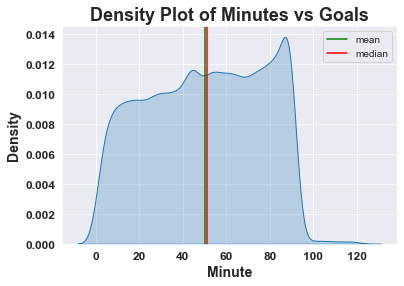

In [9]:
ax = sns.kdeplot(data=all_goals, x='minute',fill=True, cumulative=False)
ax.axvline(all_goals['minute'].mean(), color='g', label='mean')
ax.axvline(all_goals['minute'].median(), color='r', label='median')
ax.legend()
plt.xlabel('Minute', fontsize=14, fontweight="bold")
plt.ylabel('Density', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Density Plot of Minutes vs Goals", fontsize=18, fontweight="bold")
plt.savefig('figures/minute_v_allgoals.jpg')

1. Most number of goals are scored in the 90th minute, which might look surprising at first, but it is not - stay tuned to see why.
2. The median and mean stick around 50, which simply makes sense according to basic laws of probability.

We also want to visualize the home and away score against minutes, but that would require a new column which signifies that a goal has been scored by home team or away team.

We have created two boolean columns, ``home_goal`` will have value 1 if the home team has scored that goal(remember that each row is a goal), otherwise 0. Similarly, reverse for the ``away_goal`` column

In [48]:
all_goals['home_goal'] = all_goals.apply(lambda row: 1 if row['home_team']==row['team'] else 0, axis=1)
all_goals['away_goal'] = all_goals.apply(lambda row: 1 if row['away_team']==row['team'] else 0, axis=1)
minute_v_goal = all_goals.loc[:, ['minute', 'home_team', 'away_team', 'home_goal', 'away_goal']]
minute_v_goal

,minute,home_team,away_team,home_goal,away_goal
0,44.0,Chile,Uruguay,0,1
1,55.0,Chile,Uruguay,0,1
2,70.0,Chile,Uruguay,0,1
3,75.0,Chile,Uruguay,0,1
4,2.0,Argentina,Chile,1,0
...,...,...,...,...,...
40954,36.0,Argentina,France,1,0
40955,80.0,Argentina,France,0,1
40956,81.0,Argentina,France,0,1
40957,109.0,Argentina,France,1,0


In the following cell, we have grouped ``minute`` against ``home_goal`` and ``away_goal`` so that we can construct a graph of minutes against total goals in that minute.

In [50]:
minute_v_goal = minute_v_goal.groupby('minute').sum(numeric_only=True)
minute_v_goal

,home_goal,away_goal
minute,,
1.0,116,72
2.0,206,117
3.0,186,110
4.0,208,116
5.0,201,164
...,...,...
117.0,5,2
118.0,7,2
119.0,6,2


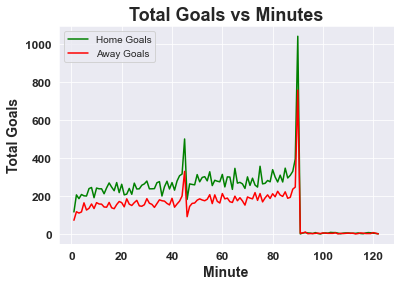

In [10]:
ax2 = sns.lineplot(data=minute_v_goal, x='minute', y='home_goal', color='g', label='Home Goals')
sns.lineplot(data=minute_v_goal, x='minute', y='away_goal', color='r', ax=ax2, label='Away Goals')
plt.xlabel('Minute', fontsize=14, fontweight="bold")
plt.ylabel('Total Goals', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Total Goals vs Minutes", fontsize=18, fontweight="bold")
plt.savefig('figures/minute_v_home_away.jpg')

It is very surprising to see how similar the distribution of both of these curves is. Let us break down this curve:
 * The flat tail after 90 minutes is pretty much obvious, because very less number of games go into the extra time.
 * Most number of goals are scored at the end of both halves. This looks surprising at first but this onl makes sense because of **injury time**. Injury time might last for anywhere between 0 to 10 minutes or even longer, hence the 90th or the 45th minutes are effectively many times longer than a minute, hence more probability of scoring goals during those minutes.

Lastly, one last column to add before we move on to the interesting stuff - the weekday column.

In [60]:
all_goals['date'] = pd.to_datetime(all_goals['date'])
all_goals['weekday'] = all_goals['date'].dt.day_name()      #extract day name from date
all_goals[['date','weekday']]

,date,weekday
0,1916-07-02,Sunday
1,1916-07-02,Sunday
2,1916-07-02,Sunday
3,1916-07-02,Sunday
4,1916-07-06,Thursday
...,...,...
40954,2022-12-18,Sunday
40955,2022-12-18,Sunday
40956,2022-12-18,Sunday
40957,2022-12-18,Sunday


As you might argue, it would make more sense to create this column in the <i>matches</i> table instead of <i>all_goals</i>. But, we want to use only <i>all_goals</i> for all the further tasks and forget the <i>matches</i> table altogether. It has done its job ;)

Let us now create a subset containing only numeric columns. Before proceeding, we would want to convert the ``neutral``,  ``own_goal`` and ``penalty`` columns into numeric because they are boolean and might be more efficiently used in numeric form

In [21]:
all_goals.loc[:, 'penalty'] = all_goals['penalty'].astype(int)
all_goals.loc[:, 'own_goal'] = all_goals['own_goal'].astype(int)
all_goals.loc[:, 'neutral'] = all_goals['neutral'].astype(int)
all_goals['penalty'].dtype

dtype('int32')

In [22]:
num_cols = all_goals.loc[:, ['date', 'neutral', 'home_score', 'away_score', 'penalty', 'own_goal', 'home_goal', 'away_goal']]
num_cols.head()

,date,neutral,home_score,away_score,penalty,own_goal,home_goal,away_goal
0,1916-07-02,1,0,4,0,0,0,1
1,1916-07-02,1,0,4,0,0,0,1
2,1916-07-02,1,0,4,0,0,0,1
3,1916-07-02,1,0,4,0,0,0,1
4,1916-07-06,0,6,1,0,0,1,0


**Brief summary of the major insights through numeric columns:**

In [51]:
to_print = {'home_goals': num_cols['home_goal'].sum(),
            'away_goals': num_cols['away_goal'].sum(),
            'penalties': num_cols['penalty'].sum(),
            'ave_goals': np.mean([matches['home_score'], matches['away_score']]),
            'max_goals': np.max([matches['home_score'].max(), matches['away_score'].max()]),
            'max_penal': np.max(num_cols.groupby('date')['penalty'].sum())}

print('Total Home Goals: {home_goals}\n'
      'Total Away Goals: {away_goals}\n'
      'Total Penalties(in match, not shoot-out): {penalties}\n'
      'Average Goals per match: {ave_goals}\n'
      'Highest number of Goals in a match: {max_goals}\n'
      'Highest number of Penalties in a match: {max_penal} (!!!CRAZYY!! NO?)'.format(**to_print))

Total Home Goals: 24783
Total Away Goals: 16176
Total Penalties(in match, not shoot-out): 2685
Average Goals per match: 1.458839239625648
Highest number of Goals in a match: 31
Highest number of Penalties in a match: 13 (!!!CRAZYY!! NO?)


In [57]:
from IPython.display import display

display(num_cols.describe())

#the above code was needed because my IDE was not displaying tables without a print statement for some reason.
#this will not be needed on you device most likely, the following code should work

#num_cols.describe()

Now, let us have a look at the distributions of some major fields.
Here are some histograms(or density plots) below, which we thought were important.
1. ``home_score`` and ``away_score`` from the ``matches`` table.
2. ``penalty`` and ``own_goal`` from the ``num_cols`` table.
3. Kernel Density plot of sum of ``home_goal`` and sum of ``penalty`` grouped by ``['date', 'home_team', 'away_team']`` ( this combination means one match)
4. Kernel Density plot of sum of ``away_goal`` and sum of ``own_goal`` grouped by ``['date', 'home_team', 'away_team']``

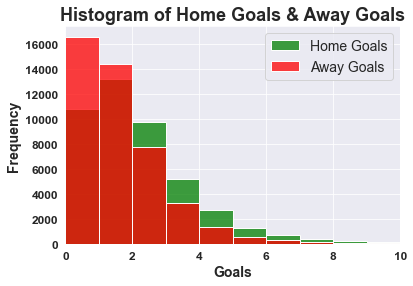

In [11]:
#1. Home score and away score from the matches table - Histogram

ax3 = sns.histplot(data=matches, x='home_score', color='g', label='Home Goals', binwidth=1)
sns.histplot(data=matches, x='away_score', color='r', label='Away Goals', binwidth=1, ax=ax3)
sns.set(rc={"figure.figsize":(10,5)}, palette="bright")
plt.ylabel('Frequency', fontsize=14, fontweight="bold")
plt.xlabel('Goals', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlim(0, 10)
plt.legend(fontsize=14)
plt.title("Histogram of Home Goals & Away Goals", fontsize=18, fontweight="bold")
plt.savefig('figures/score_histo.jpg')

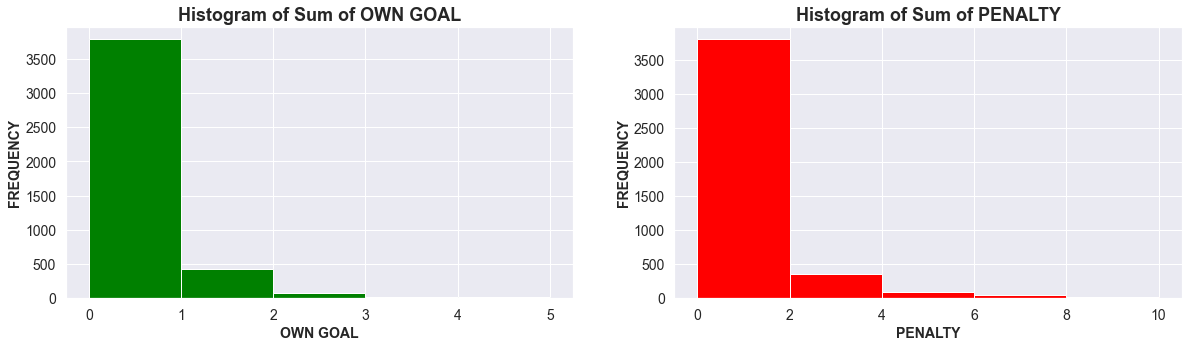

In [161]:
#2. Penalty and Own goal from num_cols - Histogram

num_cols_groupby = num_cols.groupby(["date"]).sum()[["penalty", "own_goal"]].reset_index()

fig, kdp_list = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
kdp_list[0].hist(data=num_cols_groupby, x="own_goal", color="green", bins=[0,1,2,3,4,5])
kdp_list[0].set_xlabel("OWN GOAL", fontsize=14, fontweight="bold")
kdp_list[0].set_ylabel("FREQUENCY", fontsize=14, fontweight="bold")
kdp_list[0].set_title("Histogram of Sum of OWN GOAL", fontsize=18, fontweight="bold")
kdp_list[0].tick_params(axis="x", labelsize=14)
kdp_list[0].tick_params(axis="y", labelsize=14)


kdp_list[1].hist(data=num_cols_groupby, x="penalty", color="red", bins=[0,2,4,6,8,10])
kdp_list[1].set_xlabel("PENALTY", fontsize=14, fontweight="bold")
kdp_list[1].set_ylabel("FREQUENCY", fontsize=14, fontweight="bold")
kdp_list[1].set_title("Histogram of Sum of PENALTY", fontsize=18, fontweight="bold")
kdp_list[1].tick_params(axis="x", labelsize=14)
kdp_list[1].tick_params(axis="y", labelsize=14)

plt.savefig('figures/histogram_own_goal_penalty.jpg')

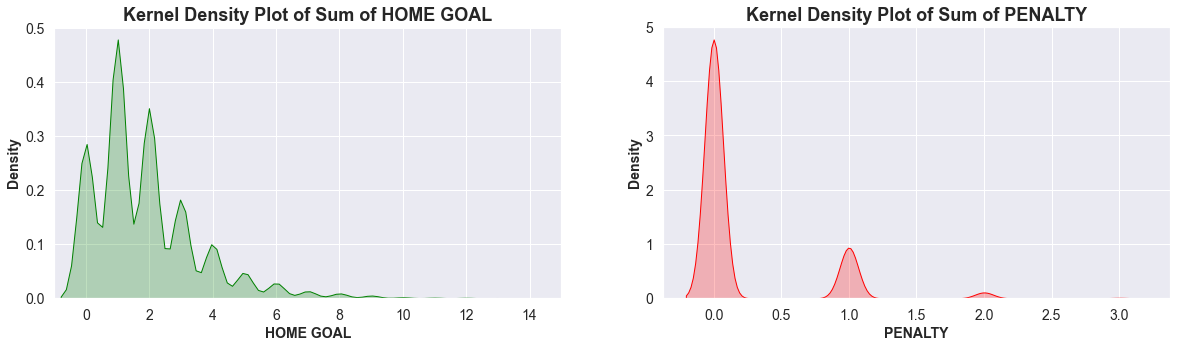

In [162]:
#3. Kernel Density plot of sum of home_goal and sum of penalty grouped by ['date', 'home_team', 'away_team'] ( this combination means one match)

all_goals_groupby = all_goals.groupby(["date", "home_team", "away_team"]).sum()[["home_goal", "penalty"]].reset_index()

fig, kdp_list = plt.subplots(ncols=2, figsize=(20,5))
sns.kdeplot(data=all_goals_groupby, x="home_goal", shade=True, ax=kdp_list[0], color="green")
kdp_list[0].set_xlabel("HOME GOAL", fontsize=14, fontweight="bold")
kdp_list[0].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[0].set_title("Kernel Density Plot of Sum of HOME GOAL", fontsize=18, fontweight="bold")
kdp_list[0].tick_params(axis="x", labelsize=14)
kdp_list[0].tick_params(axis="y", labelsize=14)
kdp_list[0].set(xlim=(-1, 15))

sns.kdeplot(data=all_goals_groupby, x="penalty", shade=True, ax=kdp_list[1], color="red")
kdp_list[1].set_xlabel("PENALTY", fontsize=14, fontweight="bold")
kdp_list[1].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[1].set_title("Kernel Density Plot of Sum of PENALTY", fontsize=18, fontweight="bold")
kdp_list[1].tick_params(axis="x", labelsize=14)
kdp_list[1].tick_params(axis="y", labelsize=14)

plt.savefig('figures/kdp_home_goal_penalty.jpg')

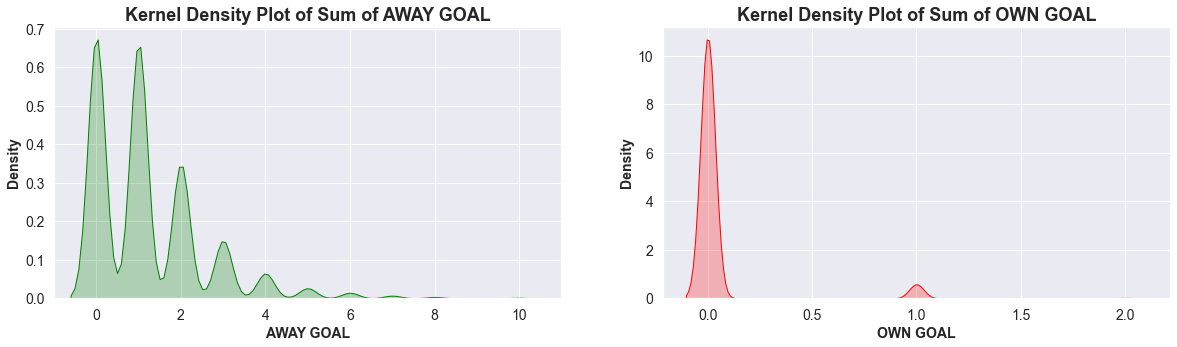

In [163]:
#4. Kernel Density plot of sum of away_goal and sum of own_goal grouped by ['date', 'home_team', 'away_team']

all_goals_groupby = all_goals.groupby(["date", "home_team", "away_team"]).sum()[["away_goal", "own_goal"]].reset_index()

fig, kdp_list = plt.subplots(ncols=2, figsize=(20,5))
sns.kdeplot(data=all_goals_groupby, x="away_goal", shade=True, ax=kdp_list[0], color="green")
kdp_list[0].set_xlabel("AWAY GOAL", fontsize=14, fontweight="bold")
kdp_list[0].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[0].set_title("Kernel Density Plot of Sum of AWAY GOAL", fontsize=18, fontweight="bold")
kdp_list[0].tick_params(axis="x", labelsize=14)
kdp_list[0].tick_params(axis="y", labelsize=14)
kdp_list[0].set(xlim=(-1, 11))

sns.kdeplot(data=all_goals_groupby, x="own_goal", shade=True, ax=kdp_list[1], color="red")
kdp_list[1].set_xlabel("OWN GOAL", fontsize=14, fontweight="bold")
kdp_list[1].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[1].set_title("Kernel Density Plot of Sum of OWN GOAL", fontsize=18, fontweight="bold")
kdp_list[1].tick_params(axis="x", labelsize=14)
kdp_list[1].tick_params(axis="y", labelsize=14)

plt.savefig('figures/kdp_away_goal_own_goal.jpg')

##### Heatmap Comparison Home team who Wins and Away team who Wins for Last 5 Years

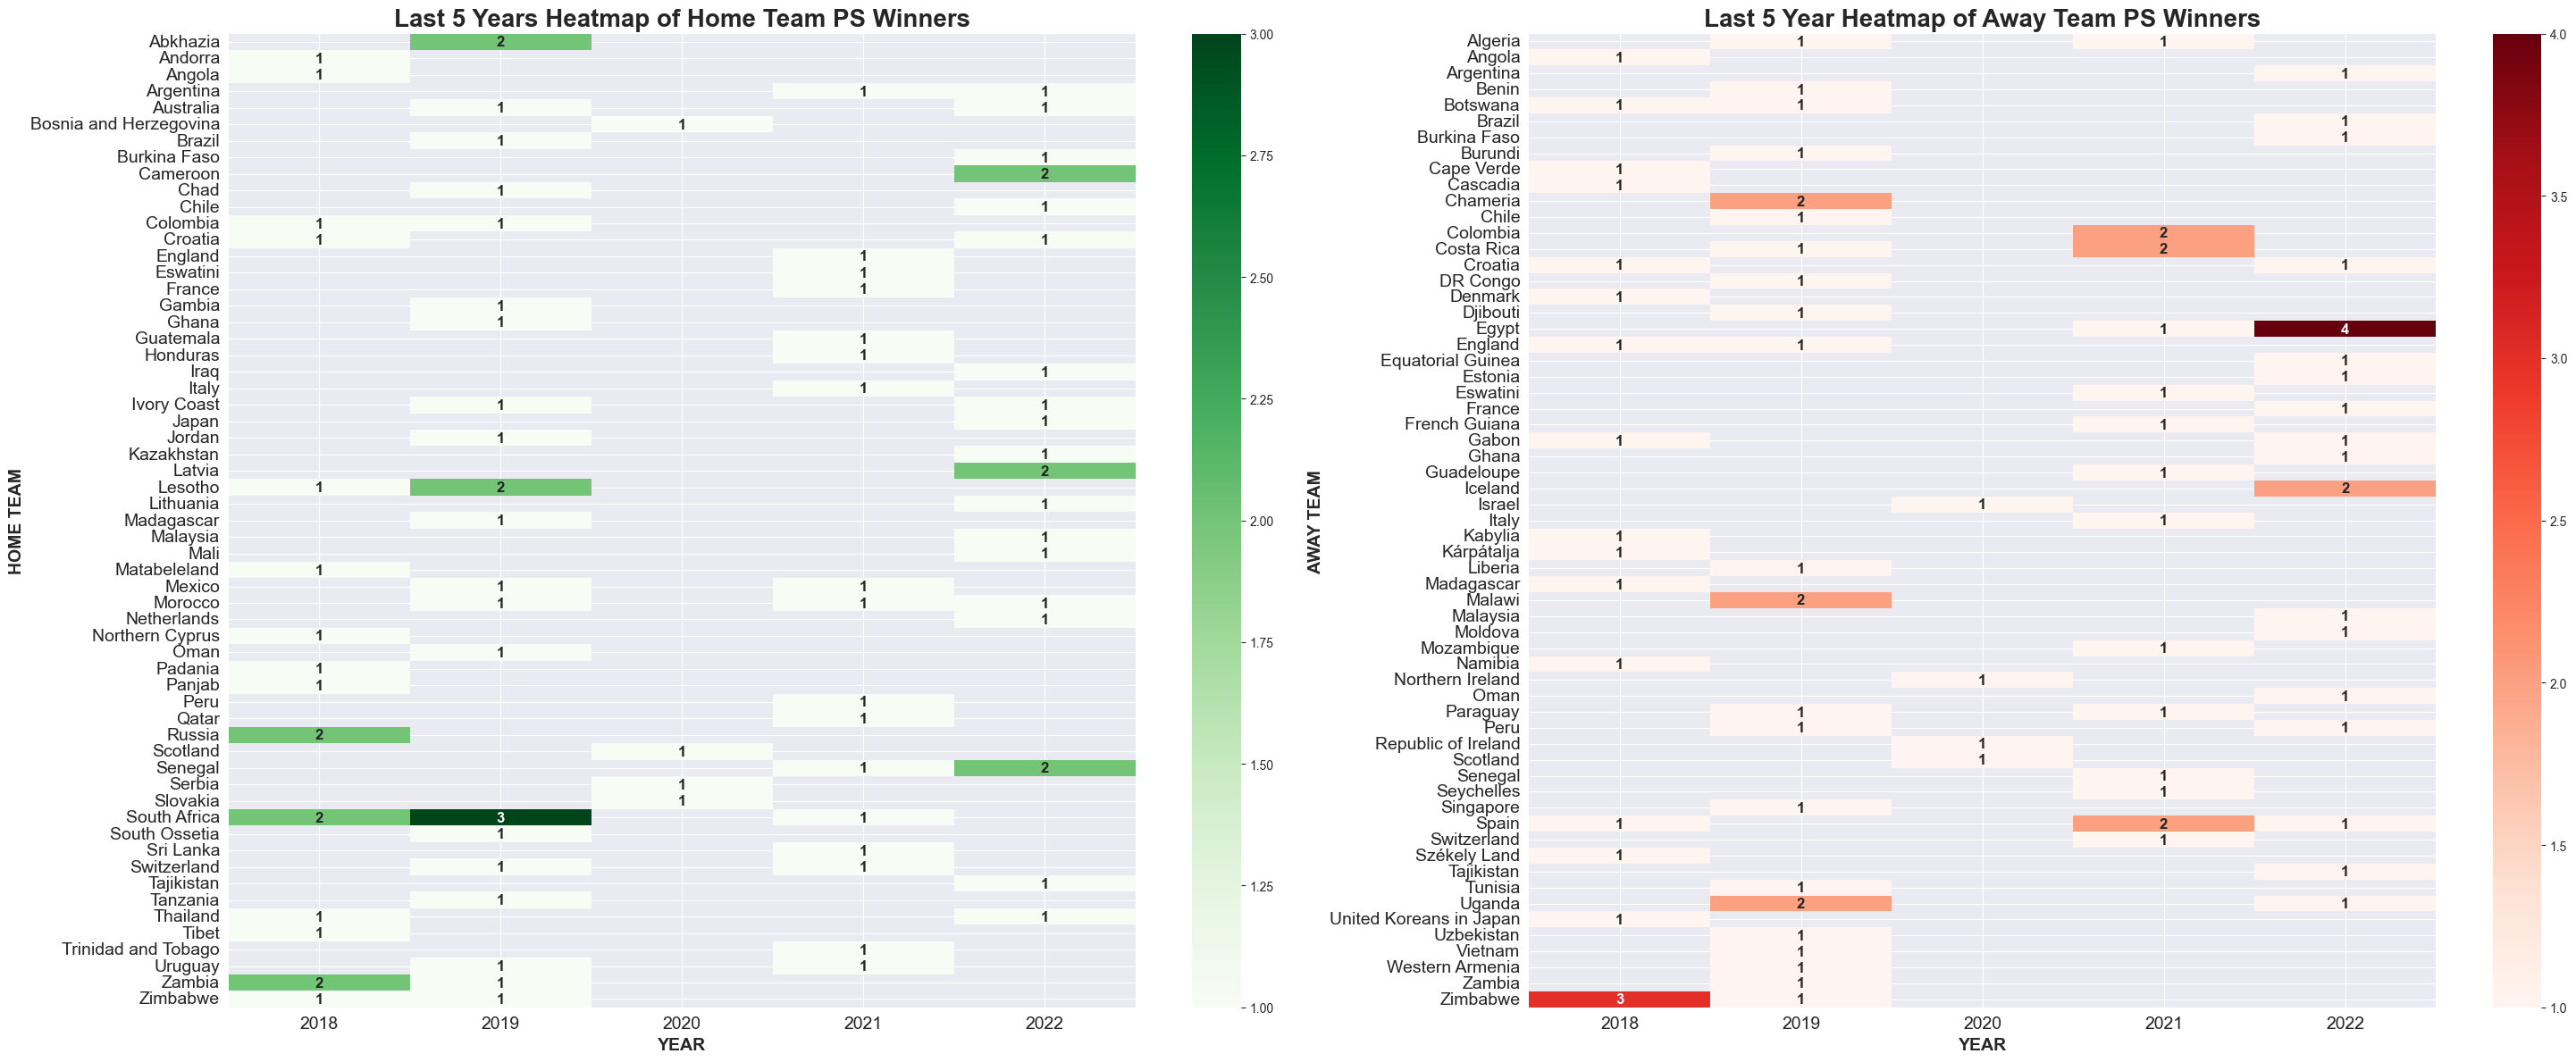

In [5]:
penalties["date"] = pd.to_datetime(penalties["date"])
penalties["year"] = penalties["date"].dt.year

list_last_5_years = penalties["year"].sort_values(ascending=True).unique()[-5:]
last_5_year_data = penalties[penalties["year"].isin(list_last_5_years)]

fig, hm_list = plt.subplots(ncols=2, figsize=(30,12))

heatmap1 = last_5_year_data.pivot_table(values="winner", index="home_team", columns="year", aggfunc="count")
sns.heatmap(data=heatmap1, ax=hm_list[0], cmap="Greens", annot=True, annot_kws={"fontsize":12, "fontweight":"bold"})
hm_list[0].set_xlabel("YEAR", fontsize=14, fontweight="bold")
hm_list[0].set_ylabel("HOME TEAM", fontsize=14, fontweight="bold")
hm_list[0].set_title("Last 5 Years Heatmap of Home Team PS Winners", fontsize=20, fontweight="bold")
hm_list[0].tick_params(axis="x", labelsize=14)
hm_list[0].tick_params(axis="y", labelsize=14)

heatmap2 = last_5_year_data.pivot_table(values="winner", index="away_team", columns="year", aggfunc="count")
sns.heatmap(data=heatmap2, ax=hm_list[1], cmap="Reds", annot=True, annot_kws={"fontsize":12, "fontweight":"bold"})
hm_list[1].set_xlabel("YEAR", fontsize=14, fontweight="bold")
hm_list[1].set_ylabel("AWAY TEAM", fontsize=14, fontweight="bold")
hm_list[1].set_title("Last 5 Year Heatmap of Away Team PS Winners", fontsize=20, fontweight="bold")
hm_list[1].tick_params(axis="x", labelsize=14)
hm_list[1].tick_params(axis="y", labelsize=14)
plt.tight_layout()
plt.savefig('figures/heatmap_home_team_VS_away_team_are_winner.jpg')

Finally, let's begin the interesting stuff.
The first question that strikes my mind while performing any sports analysis task is looking for the top players. Let us find out who are some of the best players in international football.

##### 1. Who are some of the best players in international football?

In [91]:
grouped_by_players = all_goals.groupby('scorer').sum(numeric_only=True)
grouped_by_players = grouped_by_players.drop(['home_score', 'away_score'], axis=1)       #sum of final scores is irrelevant for player data
grouped_by_players['total_goals'] = grouped_by_players['home_goal']+grouped_by_players['away_goal']
display(grouped_by_players)

,neutral,minute,own_goal,penalty,home_goal,away_goal,total_goals
scorer,,,,,,,
A'ala Hubail,5,717.0,0,1,10,3,13
A. Elangovan,0,42.0,0,0,1,0,1
Aage Rou Jensen,0,85.0,0,0,0,1,1
Aaran Lines,1,170.0,0,0,3,0,3
Aaron Boupendza,1,16.0,0,0,0,1,1
...,...,...,...,...,...,...,...
Žarko Tomašević,0,233.0,0,0,3,1,4
Željko Milinovič,1,47.0,0,0,0,2,2
Željko Čajkovski,3,369.0,0,0,2,4,6


Let's also add another column to this new dataframe - players' countries

In [130]:
#extracting players and teams and dropping duplicates while also sorting values alphabetically so that this can be merged with the grouped_by_players dataframe
nation = all_goals[['scorer', 'home_team']].drop_duplicates(subset='scorer').sort_values(by='scorer').set_index('scorer')

#appending this series to grouped_by_players
grouped_by_players['nation'] = nation

Extracting the top 10 players by total goals scored in international matches from this prepared data

In [131]:
top_10_players = grouped_by_players.sort_values(by='total_goals', ascending=False).head(10)
display(top_10_players)

,neutral,minute,own_goal,penalty,home_goal,away_goal,total_goals,nation
scorer,,,,,,,,
Cristiano Ronaldo,18,4901.0,0,16,50,41,91,Portugal
Robert Lewandowski,9,2838.0,0,11,29,27,56,San Marino
Lionel Messi,25,2475.0,0,14,39,15,54,Argentina
Ali Daei,23,2776.0,0,8,26,23,49,Iran
Miroslav Klose,13,2316.0,0,0,29,19,48,Germany
Carlos Ruiz,10,2115.0,0,4,32,15,47,Guatemala
Luis Suárez,16,2414.0,0,9,28,18,46,Uruguay
Zlatan Ibrahimović,5,2364.0,0,5,26,18,44,Sweden
Harry Kane,10,2228.0,0,13,23,21,44,England


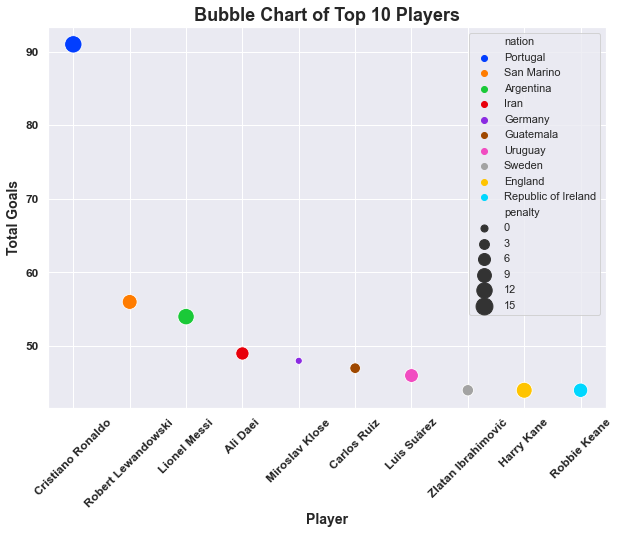

In [14]:
fig = plt.figure(figsize=(10,7))
ax5 = sns.scatterplot(data=top_10_players, x='scorer', y='total_goals', size='penalty', sizes=(50, 300), hue='nation')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.xlabel('Player', fontsize=14, fontweight="bold")
plt.ylabel('Total Goals', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Bubble Chart of Top 10 Players", fontsize=18, fontweight="bold")
plt.savefig('figures/top_10_players.jpg')

**Key Insights:** Clearly, **Cristiano Ronaldo** appears to be far ahead of his competitors in total number of goals as penalties (as per this dataset, which is not very accurate).
On the other hand, **Lionel Messi**, despite his reputation and stunning performances for club, is far behind Ronaldo in international matches.

##### Top 10 Players Goals vs Penalties Comparison

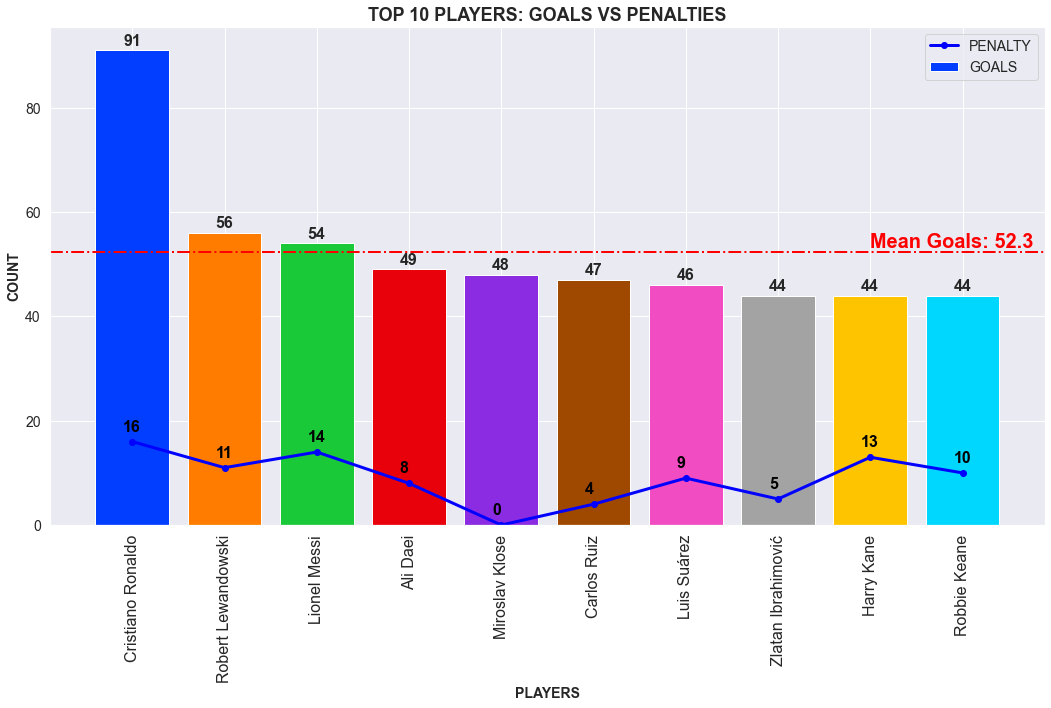

In [164]:
top_10_players = grouped_by_players.sort_values(by='total_goals', ascending=False).head(10)
top_10_players.reset_index()

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(top_10_players["scorer"], top_10_players["total_goals"], label="GOALS", color=sns.color_palette("bright",10))
ax.tick_params(axis="y", labelsize=14)
ax.plot(top_10_players["scorer"], top_10_players["penalty"], color="blue", marker="o", label="PENALTY", linewidth=3)

# Highlighting red dashdot line in Bar Chart showing Mean of top_10_players["total_goals"]
plt.axhline(top_10_players["total_goals"].mean(), color="red", linestyle="-.", linewidth="2")
plt.text(8, top_10_players["total_goals"].mean()+1, f'Mean Goals: {top_10_players["total_goals"].mean()}', fontsize=20, fontweight="bold", color="red")

for x,y in enumerate(top_10_players["total_goals"]):
    ax.text(x-0.1,y+1,str(y), fontsize=16, fontweight="bold")
for x,y in enumerate(top_10_players["penalty"]):
    ax.text(x-0.1,y+2,str(y), color="black", fontsize=16, fontweight="bold")

plt.legend(fontsize=14)
plt.xticks(rotation=90,fontsize=16)
plt.ylabel("COUNT", fontsize=14, fontweight="bold")
plt.xlabel("PLAYERS", fontsize=14, fontweight="bold")
plt.title("TOP 10 PLAYERS: GOALS VS PENALTIES", fontsize=18, fontweight="bold")
plt.show()

plt.tight_layout()
plt.savefig('figures/goal_vs_penalties.jpg')


##### 2. Which are the best performing teams over the last 10 years?

In [33]:
#counting total goals of the teams
teams_10_year = all_goals[all_goals['year']>=2013].groupby('home_team').sum(numeric_only=True).dropna()

top_teams_goals = teams_10_year[['home_goal']]

#counting total matches of the teams
top_teams_matches = all_goals[all_goals['year']>=2013].value_counts('home_team')

In [34]:
top_teams = pd.concat([top_teams_goals, top_teams_matches], axis=1).dropna()
top_teams = top_teams.rename({0:'total_matches'}, axis=1)
top_teams = top_teams.astype(int)

In [35]:
top_teams_away = all_goals[all_goals['year']>=2013].groupby('away_team').sum(numeric_only=True).dropna()
away_goals = top_teams_away[['away_goal']]

top_teams = pd.concat([top_teams, away_goals], axis=1)

The following are the top 10 teams in internationals since 2013 by number of goals.

In [38]:
top_teams['total_goals'] = top_teams['home_goal']+top_teams['away_goal']
top_teams = top_teams.sort_values('total_goals', ascending=False).head(10)
top_teams

,home_goal,total_matches,away_goal,total_goals
Germany,118,148,87,205
England,102,124,84,186
Belgium,112,134,71,183
Spain,105,124,61,166
United States,132,168,27,159
Brazil,124,160,35,159
Portugal,80,103,72,152
Netherlands,93,117,56,149
Mexico,75,107,73,148
Japan,92,125,53,145


Let's visualize them with a bar chart

In [15]:
ax7 = sns.barplot(data=top_teams, x=top_teams.index, y='total_goals')
sns.lineplot(data=top_teams, x=top_teams.index, y='total_matches', ax=ax7, color='r')
plt.xticks(rotation=75)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.savefig('figures/top_teams.jpg')

NameError: name 'top_teams' is not defined

**Key Insights** :
1. Wow! Germany has scored the highest number of goals in the past 10 years. Such a misery they have been performing terribly bad at the world cups despite such high goal scoring potential.
2. Another interesting fact that comes up is that in spite of being the world champions, Argentina are no where in the top 10 goal scoring countries. Looks like it takes more than just scoring goals to win matches :P
3. United States are the only team to have a goal-to-match ratio of below 1 (Brazil too, but they're quite close to 1 so le us not consider)

In [30]:
all_goals.value_counts('home_team')

home_team
Brazil              1021
Argentina            955
Germany              753
Chile                631
Mexico               626
                    ... 
Yemen DPR              5
Somalia                5
Vietnam Republic       4
South Sudan            4
Saarland               4
Length: 220, dtype: int64

**USE AS SAVE FILES BUTTON**

In [58]:
#this cell is for occasional saving purposes and is not intended for final submission

all_goals.to_csv('created/all_goals.csv')
goals.to_csv('created/goals.csv')
matches.to_csv('created/matches.csv')
penalties.to_csv('created/penalties.csv')
minute_v_goal.to_csv('created/goal_grouped_by_minute.csv')
num_cols.to_csv('created/num_cols.csv')
grouped_by_players.to_csv('created/grouped_by_players.csv')
top_10_players.to_csv('created/top_10_players.csv')
top_teams.to_csv('created/top_teams.csv')

**USE AS LOAD FILES BUTTON**

In [4]:
#this cell is for occasional intermediate loading purposes and is not intended for final submission

all_goals = pd.read_csv('created/all_goals.csv')
goals = pd.read_csv('created/goals.csv')
matches = pd.read_csv('created/matches.csv')
penalties = pd.read_csv('created/penalties.csv')
minute_v_goal = pd.read_csv('created/goal_grouped_by_minute.csv')
num_cols = pd.read_csv('created/num_cols.csv')
grouped_by_players = pd.read_csv('created/grouped_by_players.csv')
top_10_players = pd.read_csv('created/top_10_players.csv')
top_teams = pd.read_csv('created/top_teams.csv')